In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from torchvision import transforms

D:\develop\tools\anaconda3\envs\rl-learn\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
situations = []

In [7]:
import gym

env = gym.make('MsPacman-v0')
state = env.reset()

for _ in range(10000):
    state_prime, reward, done, info = env.step(env.action_space.sample())
    
    situations.append({
        'state': state,
        'state_prime': state_prime,
        'reward': reward,
        'done': done,
        'info': info
    })
    
    state = state_prime

In [8]:
len(situations)

10000

In [9]:
situations[0]['state']

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[228, 111, 111],
        [228, 111, 111],
        [228, 111, 111],
        ...,
        [228, 111, 111],
        [228, 111, 111],
        [228, 111, 111]],

       [[228, 111, 111],
        [228, 111, 111],
        [228, 111, 111],
        ...,
        [228, 111, 111],
        [228, 111, 111],
        [228, 111, 111]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

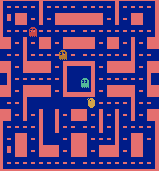

In [10]:
origin_rgb = situations[300]['state'][1:172, 1:160]
photo = transforms.ToPILImage()(origin_rgb)

photo

In [11]:
type(photo)

PIL.Image.Image

이미지를 171 X 159 X 3 에서 227 X 227 X 3 으로 변경해주어야 함

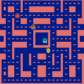

In [12]:
img_transform = transforms.Compose([
    transforms.Resize((84, 84))
])

after_photo = img_transform(photo)
after_photo

In [13]:
new_rgb = transforms.ToTensor()(after_photo)
print(new_rgb.shape)
new_rgb

torch.Size([3, 84, 84])


tensor([[[0.8941, 0.6824, 0.3725,  ..., 0.4706, 0.8588, 0.8941],
         [0.8941, 0.5294, 0.0000,  ..., 0.1647, 0.8353, 0.8941],
         [0.8941, 0.5294, 0.0000,  ..., 0.1647, 0.8353, 0.8941],
         ...,
         [0.8941, 0.5294, 0.0000,  ..., 0.1647, 0.8353, 0.8941],
         [0.8941, 0.5725, 0.1059,  ..., 0.2510, 0.8431, 0.8941],
         [0.8941, 0.8392, 0.7569,  ..., 0.7843, 0.8863, 0.8941]],

        [[0.4353, 0.3569, 0.2471,  ..., 0.2784, 0.4235, 0.4353],
         [0.4353, 0.3020, 0.1098,  ..., 0.1686, 0.4157, 0.4353],
         [0.4353, 0.3020, 0.1098,  ..., 0.1686, 0.4157, 0.4353],
         ...,
         [0.4353, 0.3020, 0.1098,  ..., 0.1686, 0.4157, 0.4353],
         [0.4353, 0.3176, 0.1490,  ..., 0.2000, 0.4196, 0.4353],
         [0.4353, 0.4157, 0.3843,  ..., 0.3961, 0.4314, 0.4353]],

        [[0.4353, 0.4588, 0.4941,  ..., 0.4824, 0.4392, 0.4353],
         [0.4353, 0.4745, 0.5333,  ..., 0.5137, 0.4431, 0.4353],
         [0.4353, 0.4745, 0.5333,  ..., 0.5137, 0.4431, 0.